In [61]:
pwd

'C:\\Users\\N A Z M U L'

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
att = pd.read_csv('E:\MSC\Thesis\without_null.csv')

In [4]:
print(att.columns)

Index(['EmpId', 'EmpCode', 'Desig_class', 'Dept_class', 'EmpType_Cls',
       'month_join', 'yrJoin', 'Gen_cls', 'GS_cat_cls', 'Age_with_null',
       'Active_cls'],
      dtype='object')


In [5]:
data = att.iloc[673:, 2:10]

X_train = data.iloc[:train_index, 0:3].astype(int)    # ['Desig_class', 'Dept_class', 'EmpType_Cls']
y_train = data.iloc[:train_index, 7].astype(int)

NameError: name 'train_index' is not defined

In [6]:
data = att.iloc[673:, 2:10]

data.sort_values(by = 'Desig_class', ascending=True, inplace=True)


# Let's say we want to split the data in 80:20 for train:valid:test dataset
train_size = 0.8
test_size=0.2

train_index = int(len(data)*train_size)
X_train = data.iloc[:train_index, 0:3].astype(int)    # ['Desig_class', 'Dept_class', 'EmpType_Cls']
y_train = data.iloc[:train_index, 7].astype(int)

train_index = int(len(data)*test_size)
X_test = data.iloc[train_index:, 0:3].astype(int)    # ['Desig_class', 'Dept_class', 'EmpType_Cls']
y_test = data.iloc[train_index:, 7].astype(int)



In [7]:
# regr_2 = DecisionTreeRegressor(max_depth=5)
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=5,random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Test single

In [8]:
dataset = np.array([[62,8,2]])
y_pred = regressor.predict(dataset)
y_pred

array([21.])

Test in large scale & PLOT

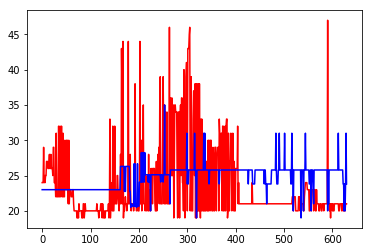

In [9]:
# scatter plot for original data
y_test = np.array(y_test)
plt.plot(y_test, color = 'red')
y_pred = regressor.predict(X_test)

# print(y_test)
# print(y_pred)

# plot predicted data
plt.plot(y_pred, color = 'blue') 

# print(type(regressor.predict(X_test)))
  
# specify title
# plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
# plt.xlabel('Production Cost')
  
# specify Y axis label
# plt.ylabel('Profit')
  
# show the plot
plt.show()

Decesion tree

In [21]:

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Desig_class', 'Dept_class', 'EmpType_Cls']) 

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("MAE: ",mean_absolute_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score: ",r2_score(y_test, y_pred))

MAE:  4.349901587156489
RMSE:  5.447022816802186
r2_score:  -0.0437309556623009
